# **Advancing Skin Disease Detection: Precision Classification for Effective Diagnosis**

HAM10000 DATASET

HAM10000 ("Human Against Machine with 10000 training images"), is a dataset created by 
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T
[1] Noel Codella, Veronica Rotemberg, Philipp Tschandl, M. Emre Celebi, Stephen Dusza, David Gutman, Brian Helba, Aadi Kalloo, Konstantinos Liopyris, Michael Marchetti, Harald Kittler, Allan Halpern: “Skin Lesion Analysis Toward Melanoma Detection 2018: A Challenge Hosted by the International Skin Imaging Collaboration (ISIC)”, 2018; https://arxiv.org/abs/1902.03368
[2] Tschandl, P., Rosendahl, C. & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161 doi:10.1038/sdata.2018.161 (2018).

The dataset consists of dermatoscopic images, that is acquired from a diverse population. The dataset has 10 015 images, and the images are divided into: 
* HAM10000_images_part1.zip (5000 JPEG files)
* HAM10000_images_part2.zip (5015 JPEG files)

There are approximately 3000 to 5000 different skin conditions, but the dataset only includes:
*  Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
*  basal cell carcinoma (bcc)
*  benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl)
*  dermatofibroma (df)
*  melanoma (mel)
*  melanocytic nevi (nv)
*  vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc)


But are shortened to:
* Melanocytic nevi
* Melanoma
* Benign keratosis-like lesions
* Basal cell carcinoma
* Actinic keratoses
* Vascular lesions
* Dermatofibroma


The meta-data includes important factors that may influence the results, such as the patients' age, and sex.  The region in which the disease is located is also revealed in the meta-data.  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

# Import Important libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

2024-10-13 00:05:54.107888: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 00:05:54.107998: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 00:05:54.236969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Import datasets

# hmnist Dataset

The hmnist csv folders are all pixel descriptions and the L has fewer columns than the RGB folder

In [3]:
hmnist_28_L=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv')
hmnist_28_L

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            169        171        170        177        181        182   
1             19         57        105        140        149        148   
2            155        163        161        167        167        172   
3             25         71        116        139        136        153   
4            129        162        181        196        205        208   
...          ...        ...        ...        ...        ...        ...   
10010        172        171        173        175        164        187   
10011          2         34        108        116        114        119   
10012        122        154        162        170        179        197   
10013        137        143        141        139        147        152   
10014        149        157        157        152        151        152   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel0775  pixel0776  \
0            181        185        194        192  ...        184        186   
1            144        155        170        170  ...        172        175   
2            155        152        165        175  ...        163        178   
3            148        161        172        162  ...        125        135   
4            205        213        225        224  ...        210        197   
...          ...        ...        ...        ...  ...        ...        ...   
10010        207        210        208        206  ...        210        217   
10011        131        139        139        145  ...        173        169   
10012        200        195        202        199  ...        221        215   
10013        155        152        155        159  ...        172        171   
10014        154        163        149        145  ...        159        154   

       pixel0777  pixel0778  pixel0779  pixel0780  pixel0781  pixel0782  \
0            185        180        157        140        140        159   
1            160        144        114         89         47         18   
2            157        166        167        148        141        136   
3            138        137        111         71         32         16   
4            172        190        195        193        181        147   
...          ...        ...        ...        ...        ...        ...   
10010        221        209        185        187        192        192   
10011        168        168        143        138         83         23   
10012        205        187        209        198        187        164   
10013        175        183        177        170        169        166   
10014        145        106         67         62        103        146   

       pixel0783  label  
0            165      2  
1             18      2  
2            115      2  
3             16      2  
4             88      2  
...          ...    ...  
10010        192      0  
10011          3      0  
10012        156      0  
10013        170      0  
10014        148      6  

[10015 rows x 785 columns]

In [4]:
hmnist_28_RGB=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
hmnist_28_RGB

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0            192        153        193        195        155        192   
1             25         14         30         68         48         75   
2            192        138        153        200        145        163   
3             38         19         30         95         59         72   
4            158        113        139        194        144        174   
...          ...        ...        ...        ...        ...        ...   
10010        183        165        181        182        165        180   
10011          2          3          1         38         33         32   
10012        132        118        118        167        149        149   
10013        160        124        146        164        131        152   
10014        175        142        121        181        150        134   

       pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0            197        154        185        202  ...        173        124   
1            123         93        126        158  ...         60         39   
2            201        142        160        206  ...        167        129   
3            143        103        119        171  ...         44         26   
4            215        162        191        225  ...        209        166   
...          ...        ...        ...        ...  ...        ...        ...   
10010        184        166        182        188  ...        208        185   
10011        121        104        103        132  ...         96         79   
10012        175        156        160        184  ...        204        181   
10013        167        127        146        169  ...        185        162   
10014        181        150        133        178  ...        159         79   

       pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0            138        183        147        166        185        154   
1             55         25         14         28         25         14   
2            143        159        124        142        136        104   
3             36         25         12         17         25         12   
4            185        172        135        149        109         78   
...          ...        ...        ...        ...        ...        ...   
10010        187        208        186        186        206        187   
10011         76         24         23         21          3          4   
10012        178        181        159        153        172        151   
10013        167        184        157        166        185        162   
10014         82        174        137        125        175        139   

       pixel2351  label  
0            177      2  
1             27      2  
2            117      2  
3             15      2  
4             92      2  
...          ...    ...  
10010        189      0  
10011          1      0  
10012        145      0  
10013        172      0  
10014        126      6  

[10015 rows x 2353 columns]

# Meta-data

In [5]:
meta_data=pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
meta_data

lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]

In [6]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


There are 10 015 entries, and 7 columns.  

The age column has fewer entries than all the other columns

In [7]:
# Check for unique entries in each column
unique_counts = meta_data.nunique()

print("\nUnique entries in each column:")
print(unique_counts)


Unique entries in each column:
lesion_id        7470
image_id        10015
dx                  7
dx_type             4
age                18
sex                 3
localization       15
dtype: int64


In [8]:
meta_data['sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [9]:
meta_data['localization'].unique()

array(['scalp', 'ear', 'face', 'back', 'trunk', 'chest',
       'upper extremity', 'abdomen', 'unknown', 'lower extremity',
       'genital', 'neck', 'hand', 'foot', 'acral'], dtype=object)

# Column description

* The lesion_id, has 7470 unique entries, this implies that there exist repetitive lesion_ids, because the dataset includes lesions with multiple images
* The image_id has 10 015 entries, this concludes that each image has a specific id. 
* The participants in the dataset belong to 18 different ages, and 3 different sexes, male female, and unknown. 
* The region of the disease is located in 15 different locations, this diversifies the dataset.  The locations are:
scalp, ear, face, back, trunk, chest,upper extremity, abdomen, unknown, lower extremity,genital,neck, hand, foot, acral


# Explaratory Data Analysis

In [10]:
meta_data.describe(include='all')

lesion_id      image_id     dx dx_type          age    sex  \
count         10015         10015  10015   10015  9958.000000  10015   
unique         7470         10015      7       4          NaN      3   
top     HAM_0003789  ISIC_0032258     nv   histo          NaN   male   
freq              6             1   6705    5340          NaN   5406   
mean            NaN           NaN    NaN     NaN    51.863828    NaN   
std             NaN           NaN    NaN     NaN    16.968614    NaN   
min             NaN           NaN    NaN     NaN     0.000000    NaN   
25%             NaN           NaN    NaN     NaN    40.000000    NaN   
50%             NaN           NaN    NaN     NaN    50.000000    NaN   
75%             NaN           NaN    NaN     NaN    65.000000    NaN   
max             NaN           NaN    NaN     NaN    85.000000    NaN   

       localization  
count         10015  
unique           15  
top            back  
freq           2192  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

Most of the columns in the dataset are categorical, so finding statistical analysis of these columns is difficult

In [11]:
print(meta_data.isnull().sum())

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


Age is the only column with null entries

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


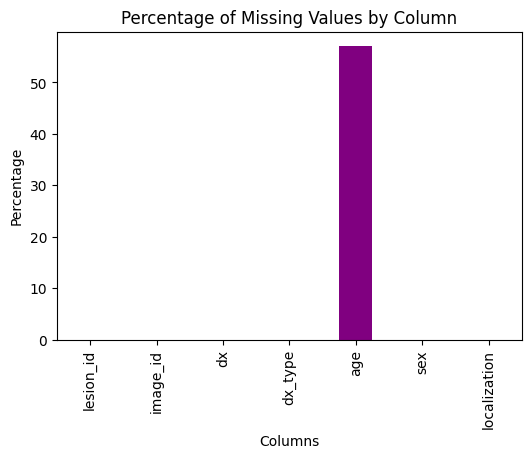

In [12]:
# 2. Bar Plot of Missing Values
missing_values = meta_data.isnull().sum()
print(missing_values)
missing_values_percentage = (missing_values)
plt.figure(figsize=(6, 4))
missing_values_percentage.plot(kind='bar', color='purple')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.show()

In [13]:
# Define categorical and numerical columns
categorical_columns = ['lesion_id', 'image_id', 'dx', 'dx_type', 'sex', 'localization']
numerical_columns = ['age']

In [14]:
# Distribution of value count for Location of disease
for column in categorical_columns:
    meta_data['localization'].value_counts()
    
meta_data['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

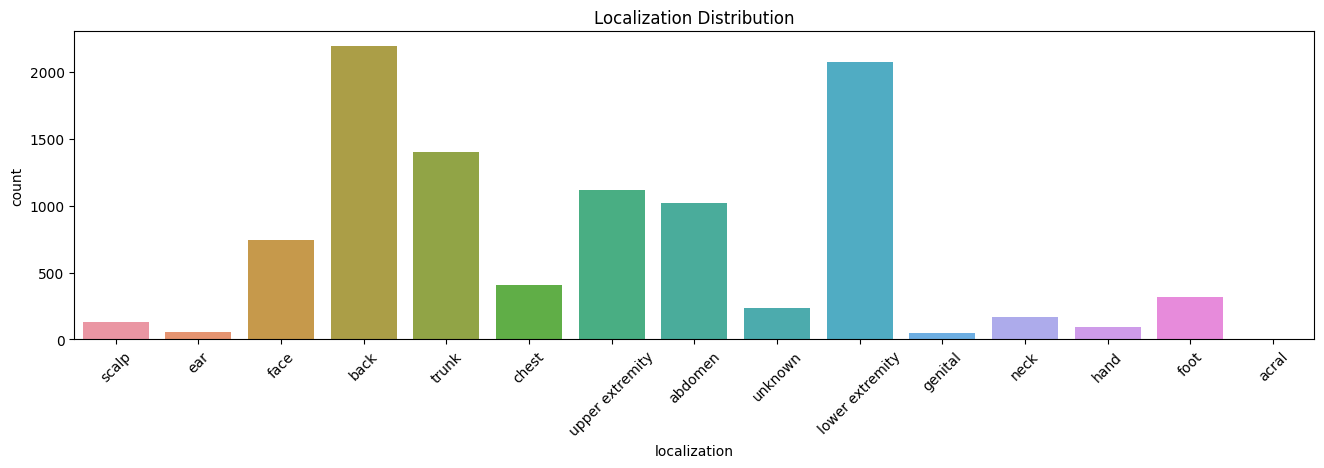

In [15]:
plt.figure(figsize=(16, 4))
sns.countplot(data=meta_data, x='localization')
plt.title('Localization Distribution')
plt.xticks(rotation=45)
plt.show()

Majority of the skin conditions that exist in the dataset are located on the back

In [16]:
# Distribution of value count for Sex in the dataset
for column in categorical_columns:
    meta_data['sex'].value_counts()
    
meta_data['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

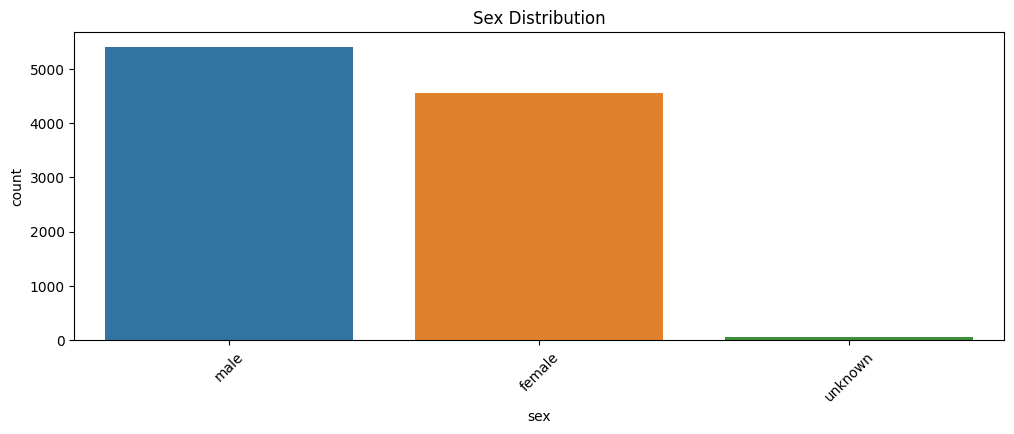

In [17]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='sex')
plt.title('Sex Distribution')
plt.xticks(rotation=45)
plt.show()

There are more males in the dataset, than females, and unknown gender

In [18]:
# Distribution of value count for Type of disease
for column in categorical_columns:
    meta_data['dx'].value_counts()
    
meta_data['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

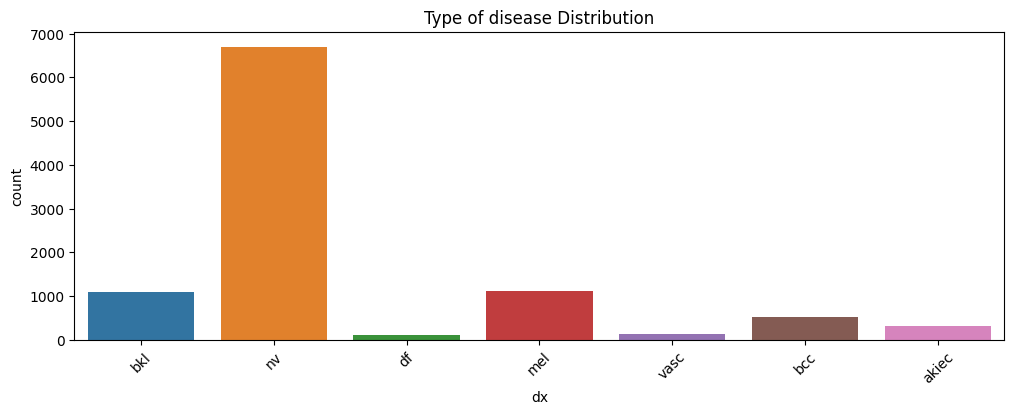

In [19]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.show()

The skin condition that is more prevalent in the dataset is the melanocytic nevi

In [20]:
# Distribution of value count for Confirmation method of disease
for column in categorical_columns:
    meta_data['dx_type'].value_counts()
    
meta_data['dx_type'].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

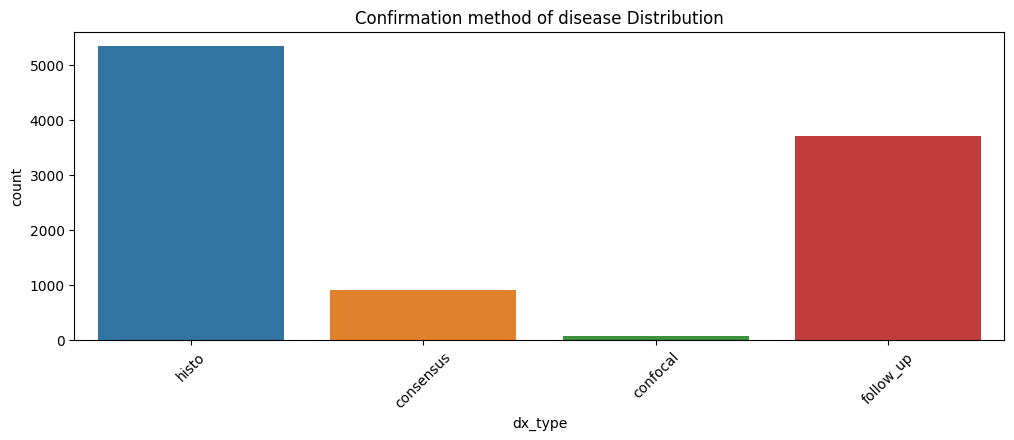

In [21]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type')
plt.title('Confirmation method of disease Distribution')
plt.xticks(rotation=45)
plt.show()

Most conditions are confirmed through histopathology (histo), secondandly through follow-up examination (follow_up), thirdly through expert consensus (consensus), and lastly through in-vivo confocal microscopy (confocal)

In [22]:
# Distribution of numerical columns
for column in numerical_columns:
    print(f"\nValue counts for {column}:")
    print(meta_data[column].value_counts(dropna=False))  # Include NaN in counts


Value counts for age:
age
45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
NaN       57
10.0      41
0.0       39
Name: count, dtype: int64


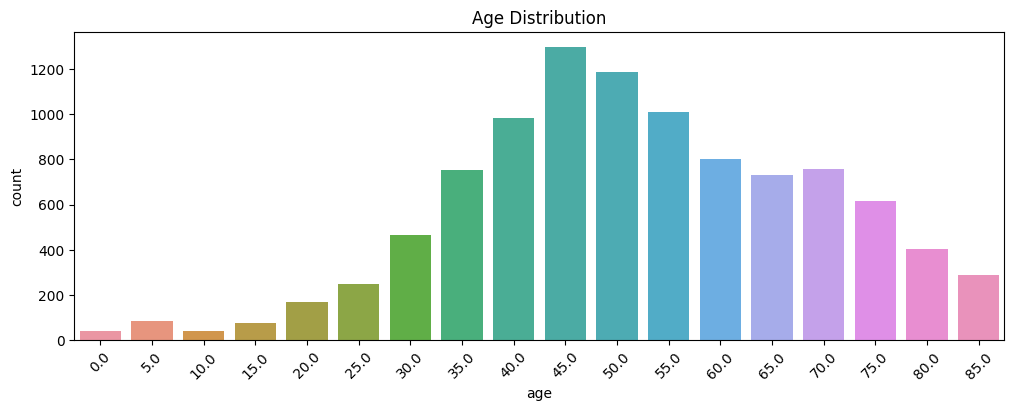

In [23]:
# Distribution of Age in pictorial format
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

The most prominent age in the dataset, is 45

# Explaratpry Data Analysis for Relationship among variables

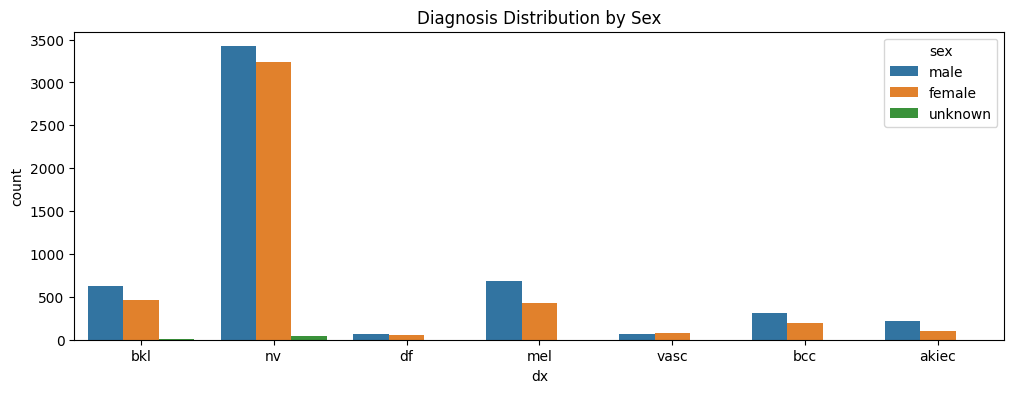

In [24]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx', hue='sex')
plt.title('Diagnosis Distribution by Sex')
plt.show()

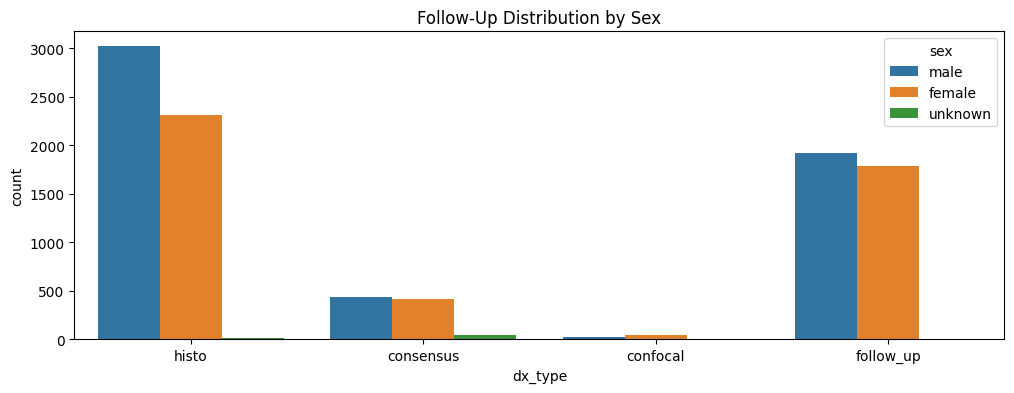

In [25]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='dx_type', hue='sex')
plt.title('Follow-Up Distribution by Sex')
plt.show()

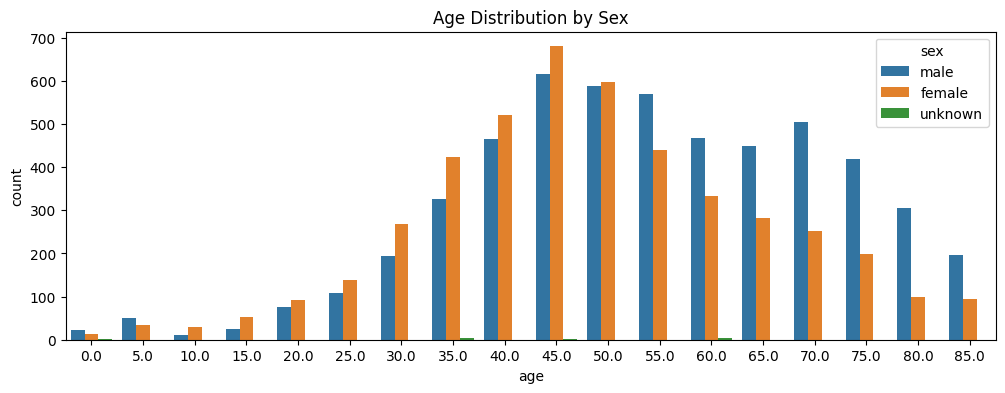

In [26]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='sex')
plt.title('Age Distribution by Sex')
plt.show()

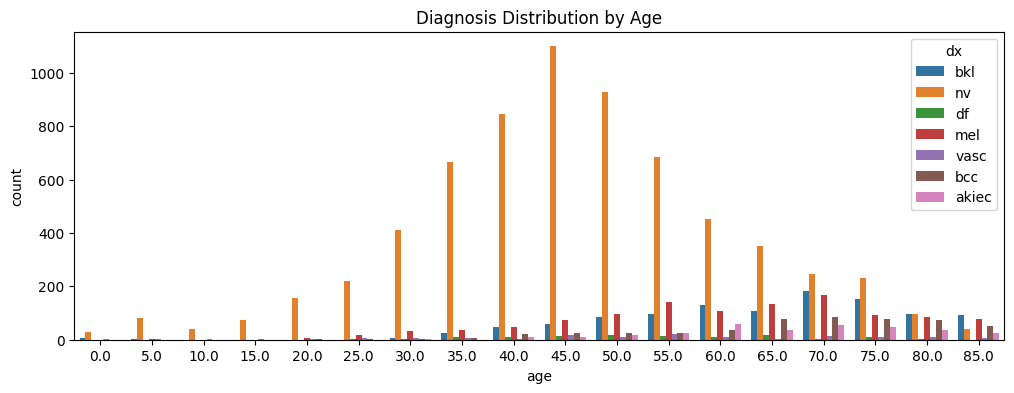

In [27]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx')
plt.title('Diagnosis Distribution by Age')
plt.show()

nv is the most dominant disease amongst all the ages

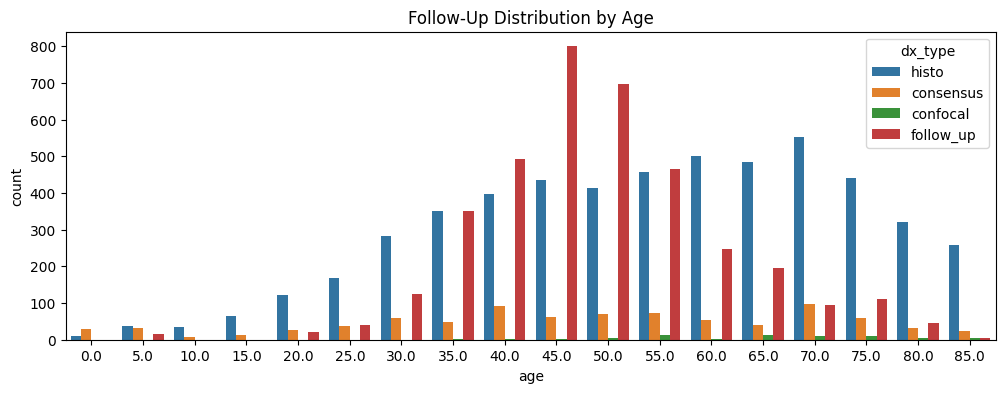

In [28]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='age', hue='dx_type')
plt.title('Follow-Up Distribution by Age')
plt.show()

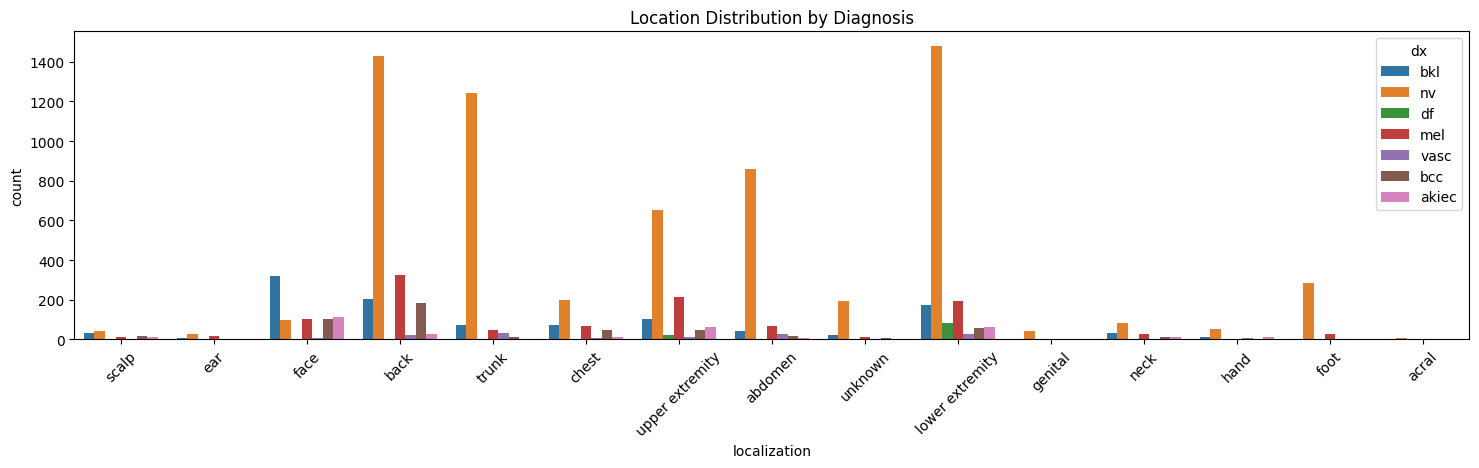

In [29]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx')
plt.title('Location Distribution by Diagnosis')
plt.xticks(rotation=45)
plt.show()

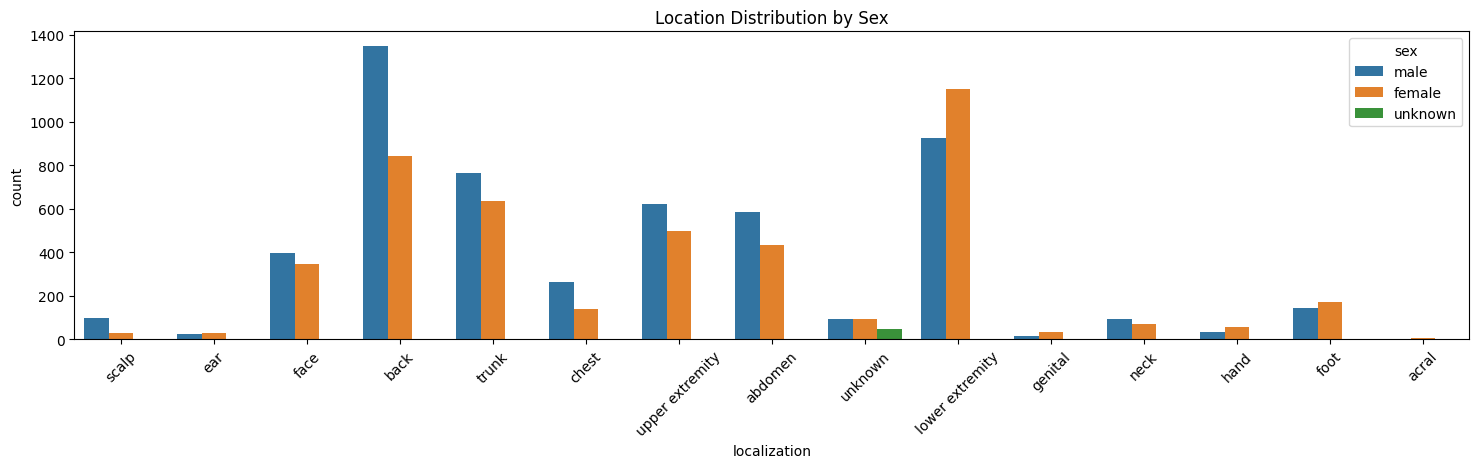

In [30]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='sex')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

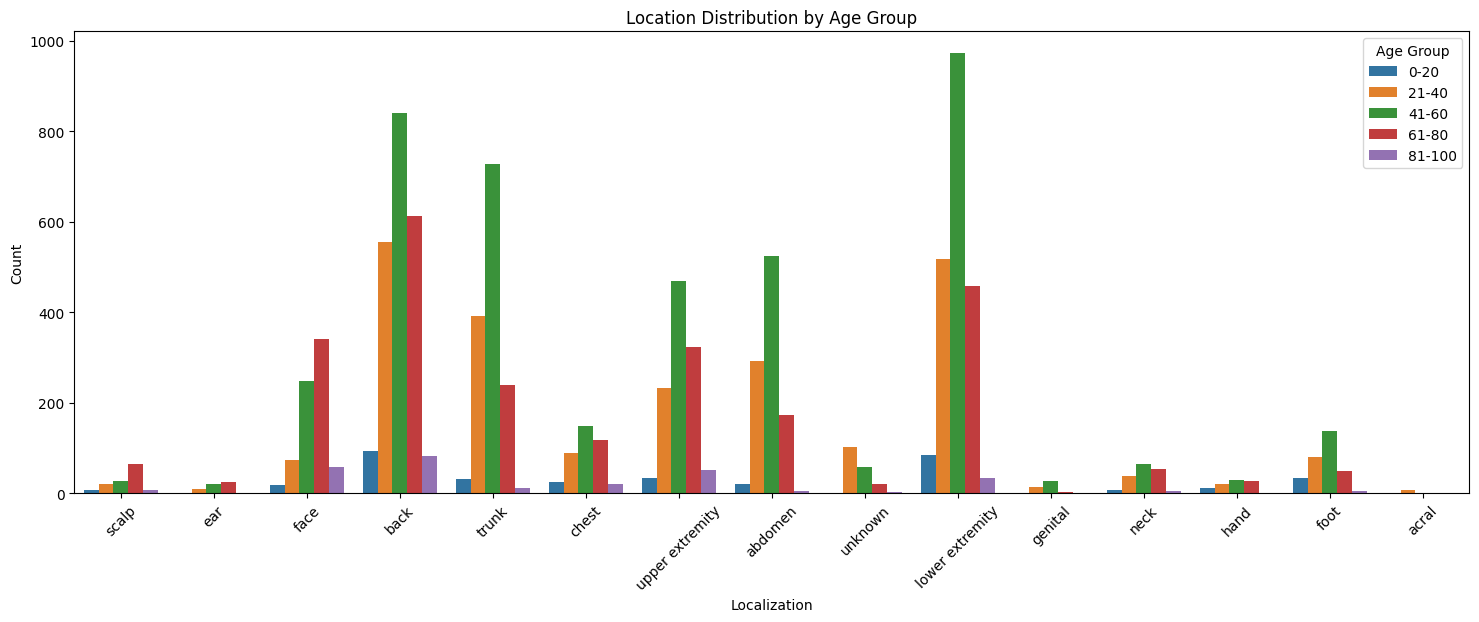

In [31]:
# Assuming 'age' column contains numerical values, create age groups
age_groups = pd.cut(meta_data['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Add the age groups as a new column in the DataFrame
meta_data['age_group'] = age_groups

# Visualizing relationships between categorical columns and age groups
plt.figure(figsize=(18, 6))
sns.countplot(data=meta_data, x='localization', hue='age_group')
plt.title('Location Distribution by Age Group')
plt.xlabel('Localization')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Group')
plt.show()

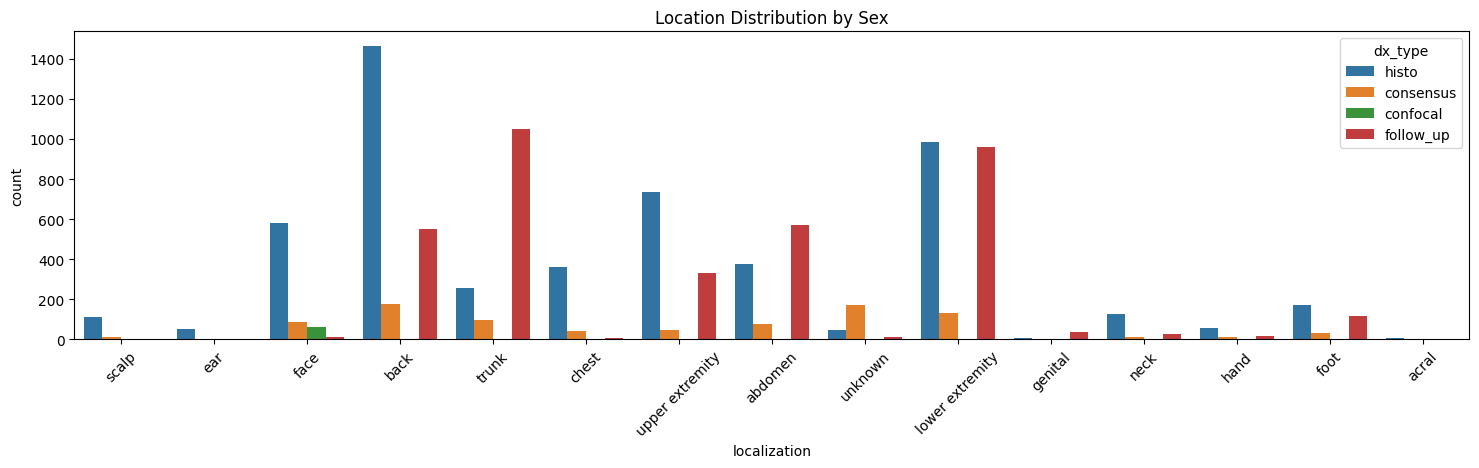

In [32]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='localization', hue='dx_type')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

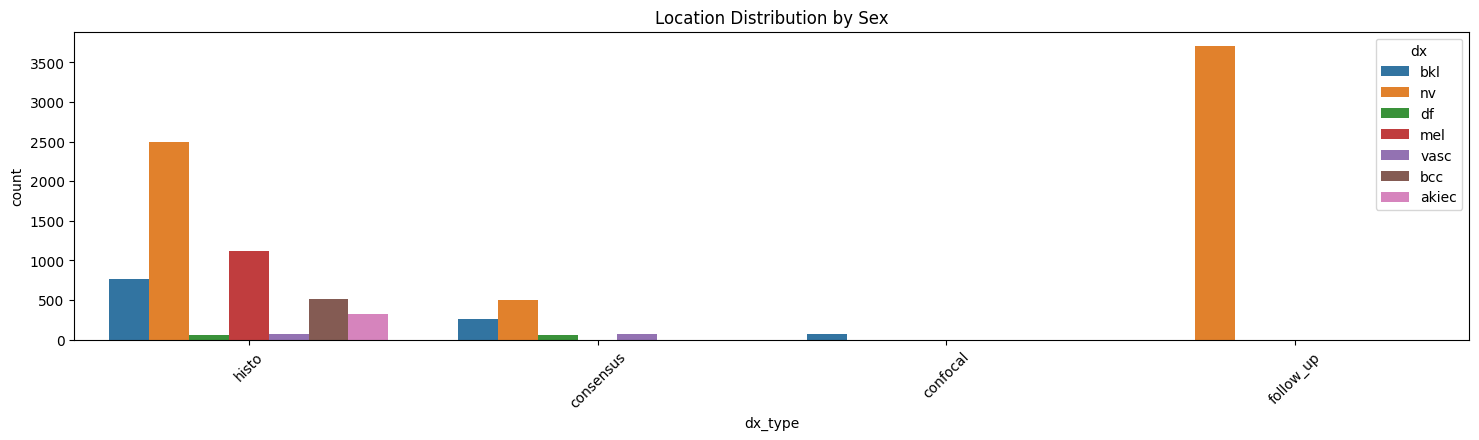

In [33]:
# Visualizing relationships between categorical columns
plt.figure(figsize=(18, 4))
sns.countplot(data=meta_data, x='dx_type', hue='dx')
plt.title('Location Distribution by Sex')
plt.xticks(rotation=45)
plt.show()

# DATA PREPROCESSING

Step 1: Data cleansing involves identifying and correcting errors or inconsistencies in the data.

In [34]:
# Removing duplicate rows
meta_data = meta_data.drop_duplicates()
meta_data = meta_data.drop(columns=['age_group'])

In [35]:
#Handle Missing Entries using the median
# Replace missing values in 'age' column with median age
median_age = meta_data['age'].median()
meta_data['age'] = meta_data['age'].fillna(median_age)

In [36]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


Fixing column names

In [37]:
meta_data = meta_data.rename(columns={
    'lesion_id': 'Lesion_Id',
    'image_id': 'Image_Id',
    'dx': 'Diagnosis',
    'dx_type': 'Confirmation_Method',
    'age': 'Age',
    'sex': 'Sex',
    'localization': 'Region_Of_Disease'
})

In [38]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lesion_Id            10015 non-null  object 
 1   Image_Id             10015 non-null  object 
 2   Diagnosis            10015 non-null  object 
 3   Confirmation_Method  10015 non-null  object 
 4   Age                  10015 non-null  float64
 5   Sex                  10015 non-null  object 
 6   Region_Of_Disease    10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [39]:
# Define the mapping of current values to new values
diagnosis_mapping = {
    'mel': 'Melanoma',
    'bkl': 'Benign Keratosis-Like Lesions',
    'bcc': 'Basal Cell Carcinoma',
    'akiec': 'Actinic Keratoses',
    'vasc': 'Vascular Lesions',
    'df': 'Dermatofibroma',
    'nv': 'Melanocytic Nevi'
}

# Create a new column with the updated diagnosis names
meta_data['Updated_Diagnosis'] = meta_data['Diagnosis'].map(diagnosis_mapping)

In [40]:
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method   Age   Sex  \
0  HAM_0000118  ISIC_0027419       bkl               histo  80.0  male   
1  HAM_0000118  ISIC_0025030       bkl               histo  80.0  male   
2  HAM_0002730  ISIC_0026769       bkl               histo  80.0  male   
3  HAM_0002730  ISIC_0025661       bkl               histo  80.0  male   
4  HAM_0001466  ISIC_0031633       bkl               histo  75.0  male   

  Region_Of_Disease              Updated_Diagnosis  
0             scalp  Benign Keratosis-Like Lesions  
1             scalp  Benign Keratosis-Like Lesions  
2             scalp  Benign Keratosis-Like Lesions  
3             scalp  Benign Keratosis-Like Lesions  
4               ear  Benign Keratosis-Like Lesions

In [41]:
meta_data['Age'] = meta_data['Age'].astype(int)

In [42]:
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age   Sex  \
0  HAM_0000118  ISIC_0027419       bkl               histo   80  male   
1  HAM_0000118  ISIC_0025030       bkl               histo   80  male   
2  HAM_0002730  ISIC_0026769       bkl               histo   80  male   
3  HAM_0002730  ISIC_0025661       bkl               histo   80  male   
4  HAM_0001466  ISIC_0031633       bkl               histo   75  male   

  Region_Of_Disease              Updated_Diagnosis  
0             scalp  Benign Keratosis-Like Lesions  
1             scalp  Benign Keratosis-Like Lesions  
2             scalp  Benign Keratosis-Like Lesions  
3             scalp  Benign Keratosis-Like Lesions  
4               ear  Benign Keratosis-Like Lesions

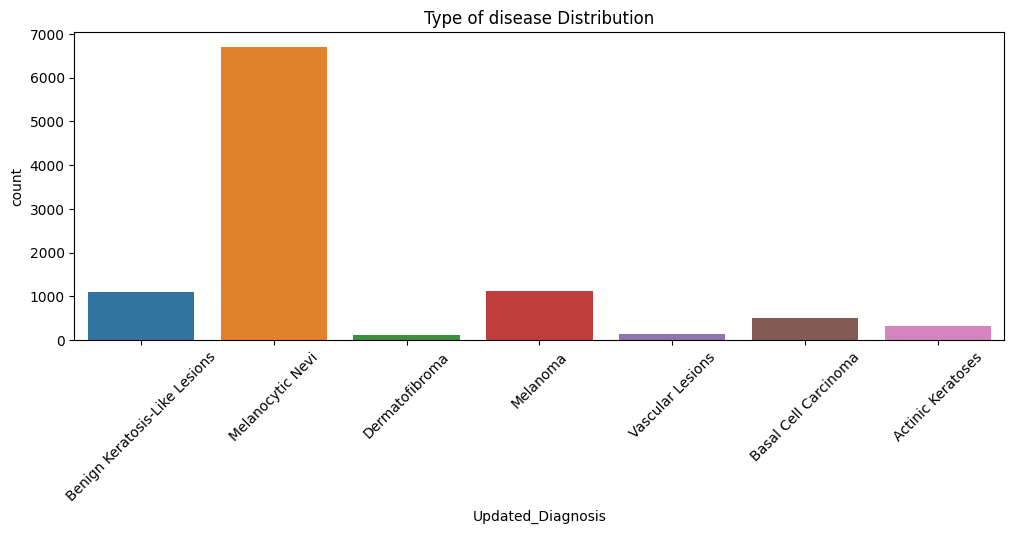

In [43]:
plt.figure(figsize=(12, 4))
sns.countplot(data=meta_data, x='Updated_Diagnosis')
plt.title('Type of disease Distribution')
plt.xticks(rotation=45)
plt.savefig('disease_distribution.png',dpi=300,bbox_inches='tight')
plt.show()

# PreProcessing Complete

In [44]:
#Path to the images
image_path1='/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1'
image_path2='/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_2'

In [45]:
#Directory for final combined images
final_image_dataset = '/kaggle/working/skin-cancer-mnist-ham10000'

In [46]:
import os
import shutil
# Create the destination folder if it doesn't exist
if not os.path.exists(final_image_dataset):
    os.makedirs(final_image_dataset)

# Iterate through files in folder 1 and copy them to the destination folder
for filename in os.listdir(image_path1):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Specify file extensions as needed
        shutil.copy(os.path.join(image_path1, filename), final_image_dataset)

# Iterate through files in folder 2 and copy them to the destination folder
for filename in os.listdir(image_path2):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Specify file extensions as needed
        shutil.copy(os.path.join(image_path2, filename), final_image_dataset)

In [47]:
meta_data['Image_path'] = meta_data['Image_Id'].apply(lambda x: os.path.join(final_image_dataset, f"{x}.jpg"))

In [48]:
meta_data

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0      HAM_0000118  ISIC_0027419       bkl               histo   80    male   
1      HAM_0000118  ISIC_0025030       bkl               histo   80    male   
2      HAM_0002730  ISIC_0026769       bkl               histo   80    male   
3      HAM_0002730  ISIC_0025661       bkl               histo   80    male   
4      HAM_0001466  ISIC_0031633       bkl               histo   75    male   
...            ...           ...       ...                 ...  ...     ...   
10010  HAM_0002867  ISIC_0033084     akiec               histo   40    male   
10011  HAM_0002867  ISIC_0033550     akiec               histo   40    male   
10012  HAM_0002867  ISIC_0033536     akiec               histo   40    male   
10013  HAM_0000239  ISIC_0032854     akiec               histo   80    male   
10014  HAM_0003521  ISIC_0032258       mel               histo   70  female   

      Region_Of_Disease              Updated_Diagnosis  \
0                 scalp  Benign Keratosis-Like Lesions   
1                 scalp  Benign Keratosis-Like Lesions   
2                 scalp  Benign Keratosis-Like Lesions   
3                 scalp  Benign Keratosis-Like Lesions   
4                   ear  Benign Keratosis-Like Lesions   
...                 ...                            ...   
10010           abdomen              Actinic Keratoses   
10011           abdomen              Actinic Keratoses   
10012           abdomen              Actinic Keratoses   
10013              face              Actinic Keratoses   
10014              back                       Melanoma   

                                              Image_path  
0      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
1      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
2      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
3      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
4      /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
...                                                  ...  
10010  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
10011  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
10012  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
10013  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  
10014  /kaggle/working/skin-cancer-mnist-ham10000/ISI...  

[10015 rows x 9 columns]

# View Images

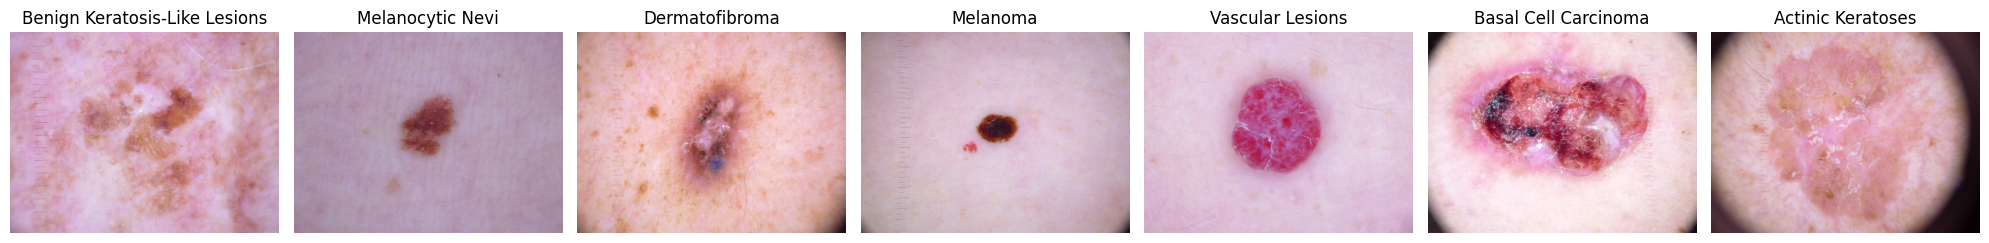

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Function to display one image per class
def display_one_image_per_class(meta_data):
    classes = meta_data['Updated_Diagnosis'].unique()
    fig, axes = plt.subplots(1, len(classes), figsize=(20, 5))
    
    for i, class_name in enumerate(classes):
        class_images = meta_data[meta_data['Updated_Diagnosis'] == class_name]['Image_path']
        if not class_images.empty:
            image_path = class_images.iloc[0]  # Select the first image of each class
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(class_name)

    plt.tight_layout()
    plt.show()

# Display one image per class from the DataFrame
display_one_image_per_class(meta_data)

# Label Encoder

In [50]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'Region_Of_Disease' column
meta_data['Updated_Diagnosis_Label'] = label_encoder.fit_transform(meta_data['Updated_Diagnosis'])

# Display the mapping between original labels and encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

Label Encoding Mapping:
{'Actinic Keratoses': 0, 'Basal Cell Carcinoma': 1, 'Benign Keratosis-Like Lesions': 2, 'Dermatofibroma': 3, 'Melanocytic Nevi': 4, 'Melanoma': 5, 'Vascular Lesions': 6}


In [51]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Lesion_Id                10015 non-null  object
 1   Image_Id                 10015 non-null  object
 2   Diagnosis                10015 non-null  object
 3   Confirmation_Method      10015 non-null  object
 4   Age                      10015 non-null  int64 
 5   Sex                      10015 non-null  object
 6   Region_Of_Disease        10015 non-null  object
 7   Updated_Diagnosis        10015 non-null  object
 8   Image_path               10015 non-null  object
 9   Updated_Diagnosis_Label  10015 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 782.5+ KB


# Balance the Dataset

In [52]:
pip install imgaug opencv-python

Note: you may need to restart the kernel to use updated packages.


In [53]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import imgaug.augmenters as iaa
from sklearn.model_selection import train_test_split
from skimage import io

In [54]:
from imgaug import augmenters as iaa
import pandas as pd
import numpy as np
import os
from skimage import io

aug_pipeline = iaa.Sequential([
    iaa.Fliplr(0.5),  
    iaa.Flipud(0.5),  
    iaa.Affine(rotate=(-10, 10)),  
    iaa.Affine(scale={"x": (0.9, 1.1), "y": (0.9, 1.1)}),  
    iaa.Crop(percent=(0, 0.2)),  
    iaa.Affine(shear=(-5, 5)),  
    iaa.GaussianBlur(sigma=(0, 0.5)),  
    iaa.AdditiveGaussianNoise(scale=(0, 0.01*255)),  
    iaa.LinearContrast((0.9, 1.1)),  
    iaa.Resize({"height": "keep-aspect-ratio", "width": 256})
])

augmented_images_dir = '/path/to/augmented_images'
os.makedirs(augmented_images_dir, exist_ok=True)

class_counts = meta_data['Diagnosis'].value_counts()
max_count = class_counts.max()

balanced_samples = []

for label in class_counts.index:
    class_subset = meta_data[meta_data['Diagnosis'] == label]
    if len(class_subset) < max_count:
        n_augmentations = max_count - len(class_subset)
        augmented_samples = []
        for i in range(n_augmentations):
            sample = class_subset.sample(n=1, random_state=42).iloc[0]
            img_path = sample['Image_path']
            img = io.imread(img_path)
            augmented_image = aug_pipeline(image=img)
            
            augmented_image_path = os.path.join(augmented_images_dir, f'{label}_augmented_{i}.jpg')
            io.imsave(augmented_image_path, augmented_image)
            
            augmented_sample = sample.copy()
            augmented_sample['Image_path'] = augmented_image_path
            augmented_samples.append(augmented_sample)

        augmented_df = pd.DataFrame(augmented_samples)
        class_oversampled = pd.concat([class_subset, augmented_df], ignore_index=True)
    else:
        class_oversampled = class_subset

    balanced_samples.append(class_oversampled)

balanced_dataset = pd.concat(balanced_samples).reset_index(drop=True)

In [55]:
meta_data = balanced_dataset
meta_data.head()

Lesion_Id      Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0  HAM_0001751  ISIC_0024698        nv           consensus   70    male   
1  HAM_0000559  ISIC_0024693        nv           follow_up   45  female   
2  HAM_0004932  ISIC_0032212        nv           follow_up   45  female   
3  HAM_0004516  ISIC_0025775        nv           follow_up   45  female   
4  HAM_0006510  ISIC_0029828        nv           follow_up   55  female   

  Region_Of_Disease Updated_Diagnosis  \
0              face  Melanocytic Nevi   
1   upper extremity  Melanocytic Nevi   
2              foot  Melanocytic Nevi   
3              neck  Melanocytic Nevi   
4   lower extremity  Melanocytic Nevi   

                                          Image_path  Updated_Diagnosis_Label  
0  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
1  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
2  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
3  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4  
4  /kaggle/working/skin-cancer-mnist-ham10000/ISI...                        4

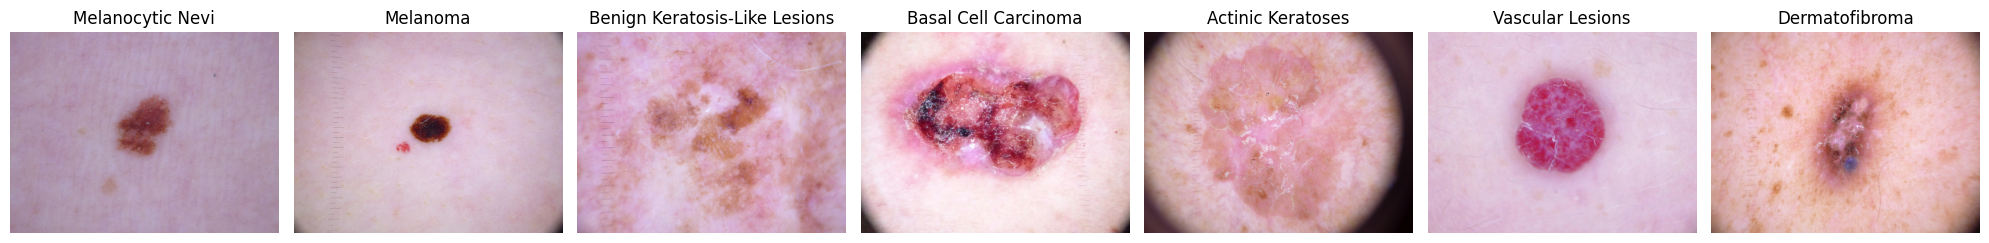

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Function to display one image per class
def display_one_image_per_class(meta_data):
    classes = meta_data['Updated_Diagnosis'].unique()
    fig, axes = plt.subplots(1, len(classes), figsize=(20, 5))
    
    for i, class_name in enumerate(classes):
        class_images = meta_data[meta_data['Updated_Diagnosis'] == class_name]['Image_path']
        if not class_images.empty:
            image_path = class_images.iloc[0]  # Select the first image of each class
            img = Image.open(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')
            axes[i].set_title(class_name)

    plt.tight_layout()
    plt.show()

# Display one image per class from the DataFrame
display_one_image_per_class(meta_data)

In [57]:
meta_data.drop(['Lesion_Id'], axis=1, inplace=True)

In [58]:
meta_data

Image_Id Diagnosis Confirmation_Method  Age     Sex  \
0      ISIC_0024698        nv           consensus   70    male   
1      ISIC_0024693        nv           follow_up   45  female   
2      ISIC_0032212        nv           follow_up   45  female   
3      ISIC_0025775        nv           follow_up   45  female   
4      ISIC_0029828        nv           follow_up   55  female   
...             ...       ...                 ...  ...     ...   
46930  ISIC_0027488        df           consensus   45    male   
46931  ISIC_0027488        df           consensus   45    male   
46932  ISIC_0027488        df           consensus   45    male   
46933  ISIC_0027488        df           consensus   45    male   
46934  ISIC_0027488        df           consensus   45    male   

      Region_Of_Disease Updated_Diagnosis  \
0                  face  Melanocytic Nevi   
1       upper extremity  Melanocytic Nevi   
2                  foot  Melanocytic Nevi   
3                  neck  Melanocytic Nevi   
4       lower extremity  Melanocytic Nevi   
...                 ...               ...   
46930   lower extremity    Dermatofibroma   
46931   lower extremity    Dermatofibroma   
46932   lower extremity    Dermatofibroma   
46933   lower extremity    Dermatofibroma   
46934   lower extremity    Dermatofibroma   

                                              Image_path  \
0      /kaggle/working/skin-cancer-mnist-ham10000/ISI...   
1      /kaggle/working/skin-cancer-mnist-ham10000/ISI...   
2      /kaggle/working/skin-cancer-mnist-ham10000/ISI...   
3      /kaggle/working/skin-cancer-mnist-ham10000/ISI...   
4      /kaggle/working/skin-cancer-mnist-ham10000/ISI...   
...                                                  ...   
46930    /path/to/augmented_images/df_augmented_6585.jpg   
46931    /path/to/augmented_images/df_augmented_6586.jpg   
46932    /path/to/augmented_images/df_augmented_6587.jpg   
46933    /path/to/augmented_images/df_augmented_6588.jpg   
46934    /path/to/augmented_images/df_augmented_6589.jpg   

       Updated_Diagnosis_Label  
0                            4  
1                            4  
2                            4  
3                            4  
4                            4  
...                        ...  
46930                        3  
46931                        3  
46932                        3  
46933                        3  
46934                        3  

[46935 rows x 9 columns]

In [59]:
shuffled_df = meta_data.sample(frac=1, random_state=42).reset_index(drop=True)

shuffled_df.head()

Image_Id Diagnosis Confirmation_Method  Age     Sex Region_Of_Disease  \
0  ISIC_0031597       bcc               histo   85  female              back   
1  ISIC_0027937      vasc           consensus   70    male             trunk   
2  ISIC_0027937      vasc           consensus   70    male             trunk   
3  ISIC_0027937      vasc           consensus   70    male             trunk   
4  ISIC_0027937      vasc           consensus   70    male             trunk   

      Updated_Diagnosis                                         Image_path  \
0  Basal Cell Carcinoma   /path/to/augmented_images/bcc_augmented_3254.jpg   
1      Vascular Lesions  /path/to/augmented_images/vasc_augmented_3903.jpg   
2      Vascular Lesions  /path/to/augmented_images/vasc_augmented_2064.jpg   
3      Vascular Lesions  /path/to/augmented_images/vasc_augmented_3307.jpg   
4      Vascular Lesions  /path/to/augmented_images/vasc_augmented_1268.jpg   

   Updated_Diagnosis_Label  
0                        1  
1                        6  
2                        6  
3                        6  
4                        6

In [60]:
meta_data=shuffled_df

# Split

In [61]:
meta_data.drop('Image_Id', axis=1, inplace=True)
meta_data

Diagnosis Confirmation_Method  Age     Sex Region_Of_Disease  \
0           bcc               histo   85  female              back   
1          vasc           consensus   70    male             trunk   
2          vasc           consensus   70    male             trunk   
3          vasc           consensus   70    male             trunk   
4          vasc           consensus   70    male             trunk   
...         ...                 ...  ...     ...               ...   
46930       mel               histo   75    male             chest   
46931        df           consensus   45    male   lower extremity   
46932      vasc           consensus   70    male             trunk   
46933        nv           follow_up   45  female              hand   
46934       bkl               histo   55  female              face   

                   Updated_Diagnosis  \
0               Basal Cell Carcinoma   
1                   Vascular Lesions   
2                   Vascular Lesions   
3                   Vascular Lesions   
4                   Vascular Lesions   
...                              ...   
46930                       Melanoma   
46931                 Dermatofibroma   
46932               Vascular Lesions   
46933               Melanocytic Nevi   
46934  Benign Keratosis-Like Lesions   

                                              Image_path  \
0       /path/to/augmented_images/bcc_augmented_3254.jpg   
1      /path/to/augmented_images/vasc_augmented_3903.jpg   
2      /path/to/augmented_images/vasc_augmented_2064.jpg   
3      /path/to/augmented_images/vasc_augmented_3307.jpg   
4      /path/to/augmented_images/vasc_augmented_1268.jpg   
...                                                  ...   
46930   /path/to/augmented_images/mel_augmented_3466.jpg   
46931    /path/to/augmented_images/df_augmented_4387.jpg   
46932  /path/to/augmented_images/vasc_augmented_4491.jpg   
46933  /kaggle/working/skin-cancer-mnist-ham10000/ISI...   
46934   /path/to/augmented_images/bkl_augmented_1286.jpg   

       Updated_Diagnosis_Label  
0                            1  
1                            6  
2                            6  
3                            6  
4                            6  
...                        ...  
46930                        5  
46931                        3  
46932                        6  
46933                        4  
46934                        2  

[46935 rows x 8 columns]

In [62]:
# Separate features (X) and target variable (y)
X = meta_data.drop(columns=['Updated_Diagnosis_Label']) 
y = meta_data['Updated_Diagnosis_Label']

# Display the shape of X and y
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)

Shape of features (X): (46935, 7)
Shape of target variable (y): (46935,)


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (37548, 7)
Shape of y_train: (37548,)
Shape of X_test: (4694, 7)
Shape of y_test: (4694,)


In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rescale=1./255,
    brightness_range=[0.8, 1.2],
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='Image_path',
    y_col='Updated_Diagnosis',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 37548 validated image filenames belonging to 7 classes.
Found 4693 validated image filenames belonging to 7 classes.
Found 4694 validated image filenames belonging to 7 classes.


# CNN

In [65]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, utils, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001), input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

In [66]:
# Compile the model
model.compile(optimizer='adam', 
                       loss='categorical_crossentropy', 
                       metrics=['accuracy'])

In [67]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(filepath='model_weights.keras', monitor='val_loss', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

In [68]:
class_counts = meta_data['Updated_Diagnosis'].value_counts().to_dict()
total_samples = sum(class_counts.values())
class_weights = {i: total_samples/count for i, count in enumerate(class_counts.values())}

print("Class weights:", class_weights)

Class weights: {0: 7.0, 1: 7.0, 2: 7.0, 3: 7.0, 4: 7.0, 5: 7.0, 6: 7.0}


In [69]:
# Training the model
history=model.fit(
    train_generator,
    epochs=10,
    batch_size=32,
    validation_data=val_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/10
   2/1174 ━━━━━━━━━━━━━━━━━━━━ 1:44 89ms/step - accuracy: 0.2656 - loss: 3.2222  

I0000 00:00:1728779184.345789     123 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1728779184.369062     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.8575 - loss: 1.5385

W0000 00:00:1728779672.672478     124 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1174/1174 ━━━━━━━━━━━━━━━━━━━━ 523s 427ms/step - accuracy: 0.8576 - loss: 1.5382 - val_accuracy: 0.6094 - val_loss: 1.9852 - learning_rate: 0.0010
Epoch 2/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 488s 413ms/step - accuracy: 0.9040 - loss: 0.7711 - val_accuracy: 0.7417 - val_loss: 1.3072 - learning_rate: 0.0010
Epoch 3/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 486s 412ms/step - accuracy: 0.9080 - loss: 0.8159 - val_accuracy: 0.9035 - val_loss: 0.8555 - learning_rate: 0.0010
Epoch 4/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 490s 415ms/step - accuracy: 0.9160 - loss: 0.8797 - val_accuracy: 0.9222 - val_loss: 0.8459 - learning_rate: 0.0010
Epoch 5/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 484s 410ms/step - accuracy: 0.9139 - loss: 0.8826 - val_accuracy: 0.6857 - val_loss: 1.3066 - learning_rate: 0.0010
Epoch 6/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 486s 412ms/step - accuracy: 0.9140 - loss: 0.8866 - val_accuracy: 0.9250 - val_loss: 0.8047 - learning_rate: 0.0010
Epoch 7/10
1174/1174 ━━━━━━━━━━━━━━━━━━━━ 497s 421ms/step - acc

In [70]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy:.2f}")

147/147 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step - accuracy: 0.9384 - loss: 0.6071
Test Accuracy: 0.94


In [71]:
# Evaluate the model
loss, accuracy = model.evaluate(train_generator)
print(f"Train Accuracy: {accuracy:.2f}")

1174/1174 ━━━━━━━━━━━━━━━━━━━━ 474s 403ms/step - accuracy: 0.9281 - loss: 0.6637
Train Accuracy: 0.93


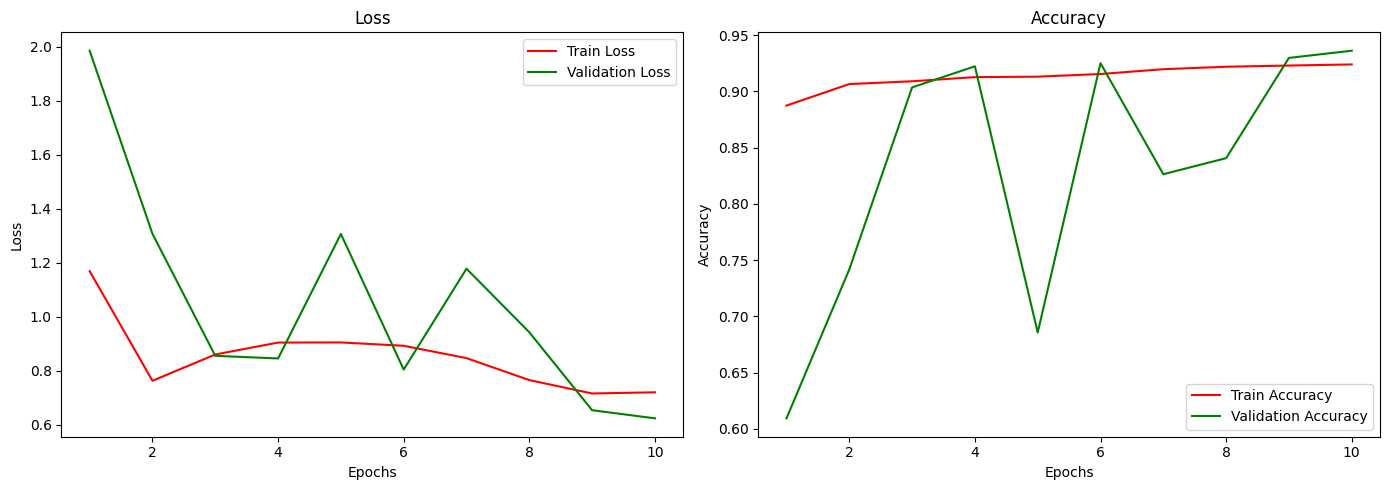

In [72]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(tr_acc) + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

  Diagnosis Confirmation_Method  Age     Sex Region_Of_Disease  \
0       bcc               histo   85  female              back   
1      vasc           consensus   70    male             trunk   
2      vasc           consensus   70    male             trunk   
3      vasc           consensus   70    male             trunk   
4      vasc           consensus   70    male             trunk   

      Updated_Diagnosis                                         Image_path  \
0  Basal Cell Carcinoma   /path/to/augmented_images/bcc_augmented_3254.jpg   
1      Vascular Lesions  /path/to/augmented_images/vasc_augmented_3903.jpg   
2      Vascular Lesions  /path/to/augmented_images/vasc_augmented_2064.jpg   
3      Vascular Lesions  /path/to/augmented_images/vasc_augmented_3307.jpg   
4      Vascular Lesions  /path/to/augmented_images/vasc_augmented_1268.jpg   

   Updated_Diagnosis_Label  
0                        1  
1                        6  
2                        6  
3                 

W0000 00:00:1728784566.636601     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step
Length of true_labels: 4694
Length of predicted_labels: 4694
Length of meta_data: 46935


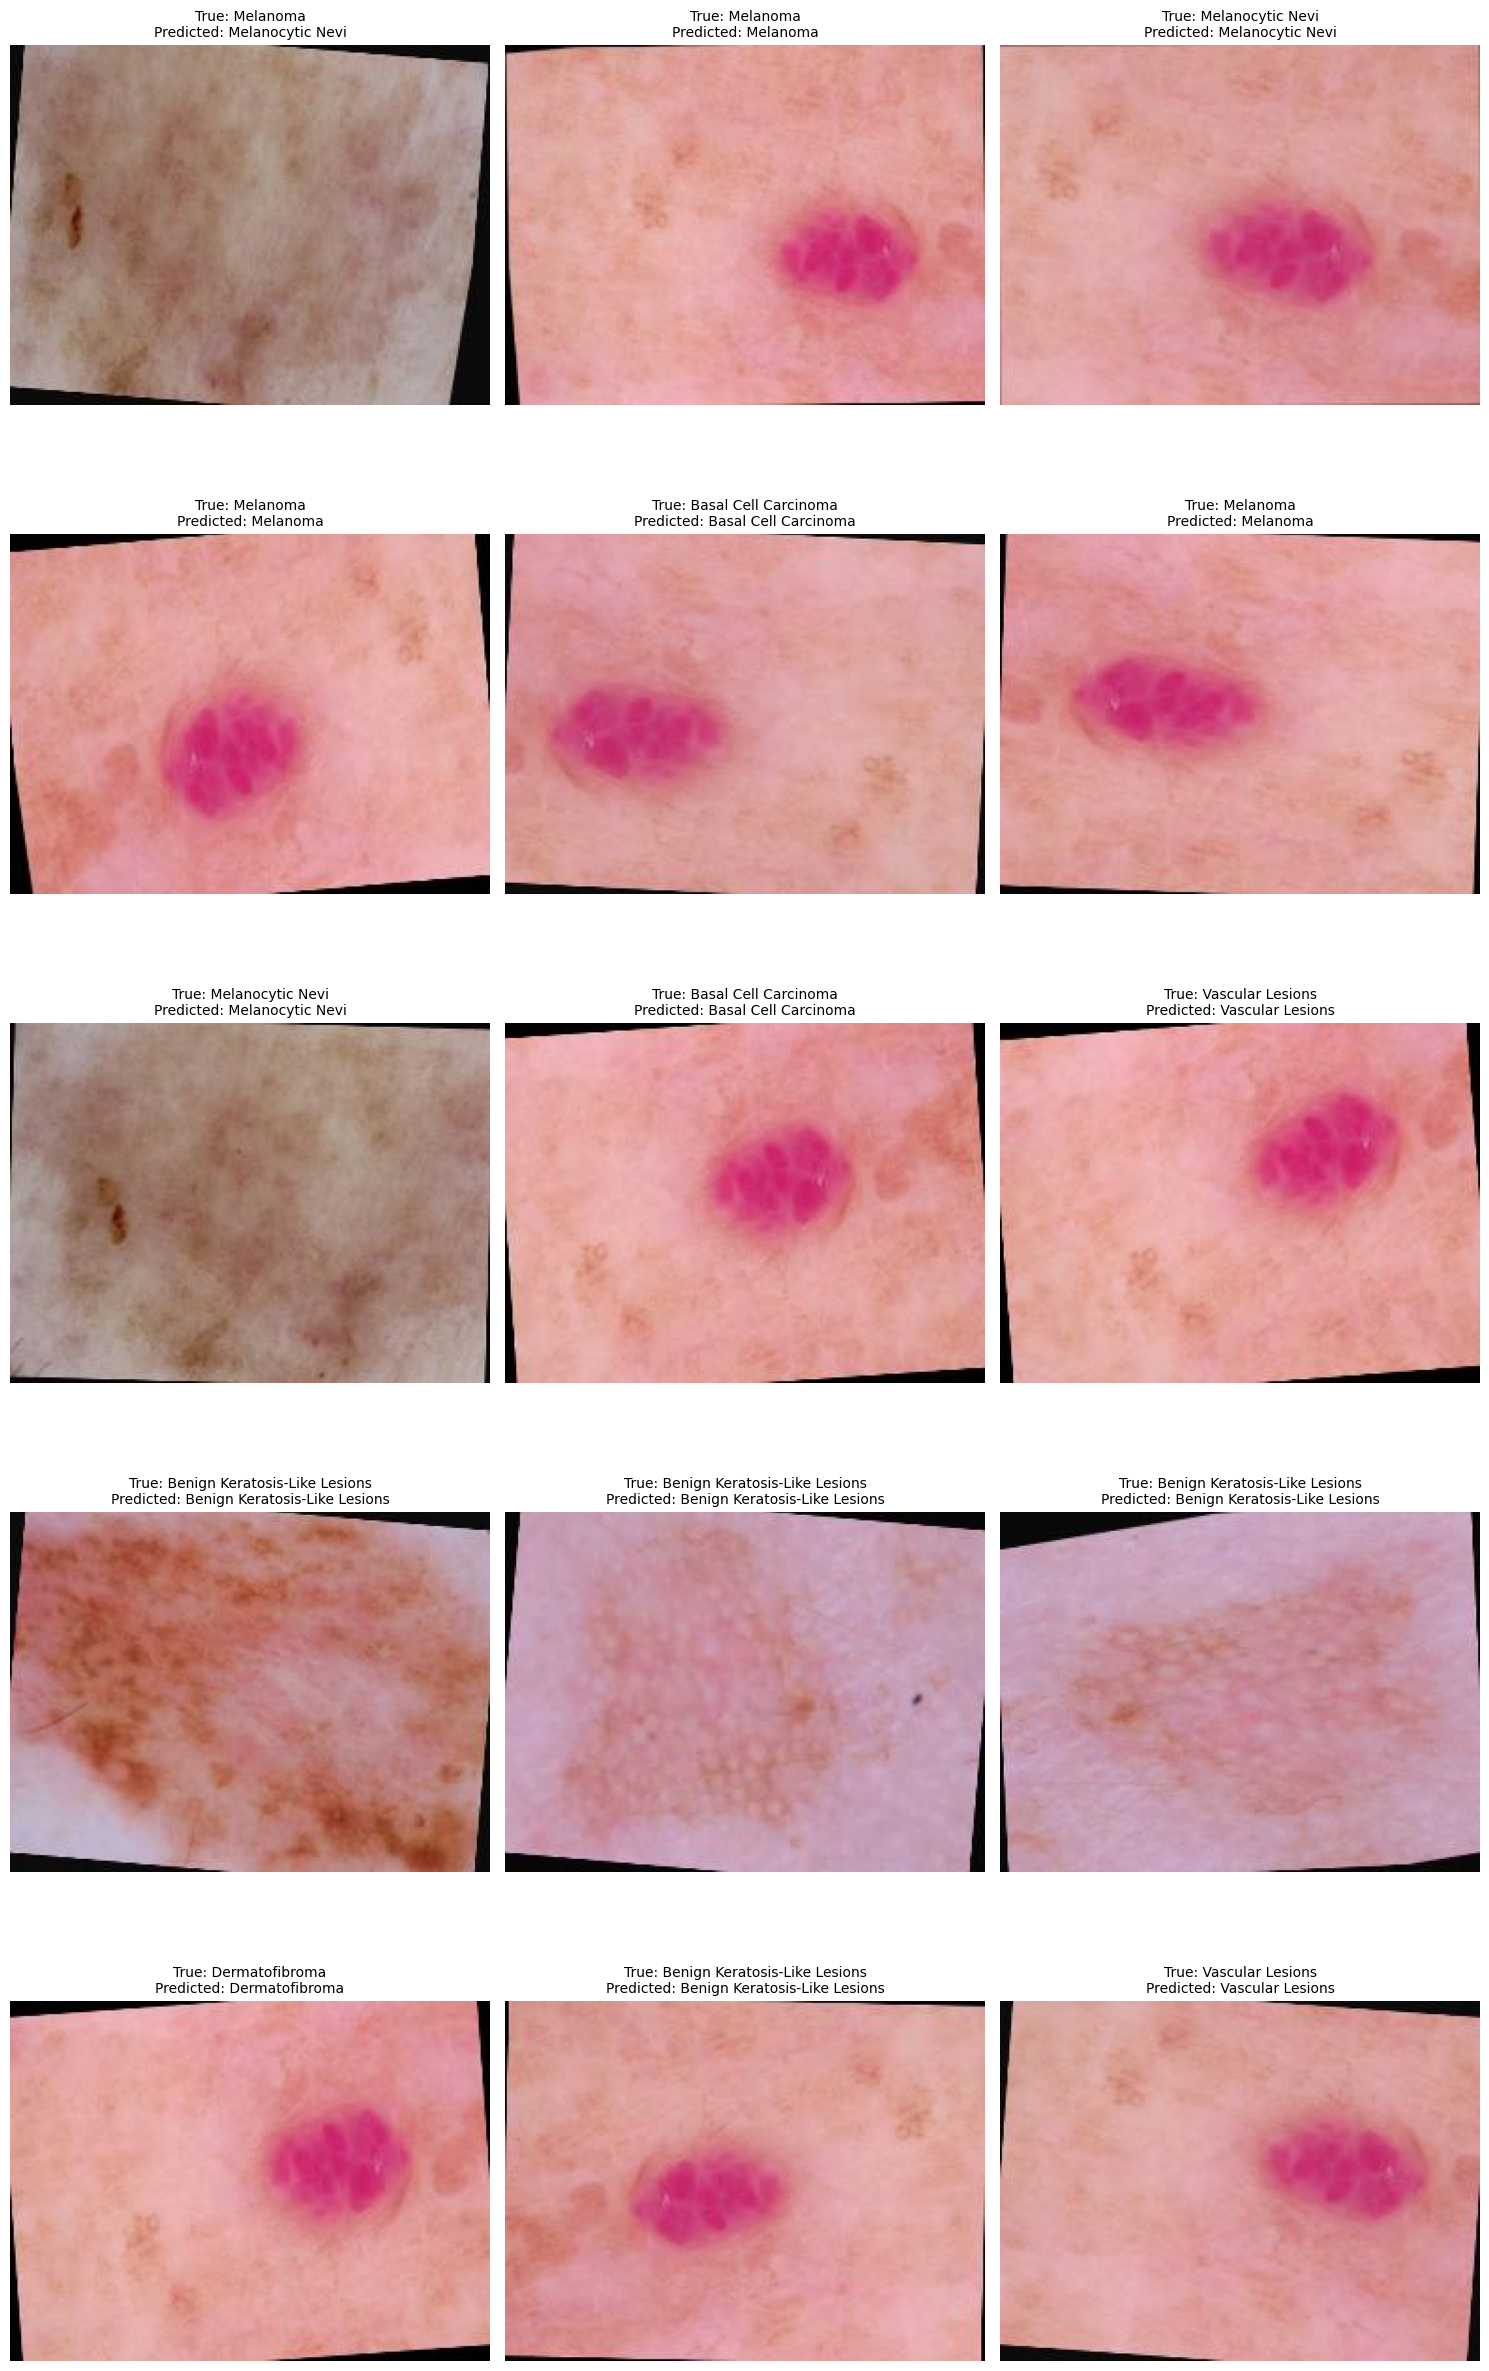

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(meta_data.head())

true_labels = test_generator.classes
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)

class_labels = list(test_generator.class_indices.keys())

print(f"Length of true_labels: {len(true_labels)}")
print(f"Length of predicted_labels: {len(predicted_labels)}")
print(f"Length of meta_data: {len(meta_data)}")

if len(true_labels) > len(meta_data):
    raise ValueError("The number of true labels exceeds the number of rows in the meta_data DataFrame.")

meta_data = meta_data.iloc[:len(true_labels)]

meta_data['true_label'] = [class_labels[true_labels[i]] for i in range(len(true_labels))]
meta_data['predicted_label'] = [class_labels[predicted_labels[i]] for i in range(len(predicted_labels))]

plt.figure(figsize=(15, 25))
for i in range(15):
    plt.subplot(5, 3, i + 1)
    img = plt.imread(meta_data['Image_path'].iloc[i])
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {meta_data['true_label'].iloc[i]}\nPredicted: {meta_data['predicted_label'].iloc[i]}", fontsize=10)

plt.tight_layout()
plt.show()

## Save The Model

In [74]:
model.save('Bonolo_Skin_Disease_CNNmodel.h5')

In [75]:
from tensorflow.keras.models import load_model

model = load_model('Bonolo_Skin_Disease_CNNmodel.h5')

In [76]:
sample_meta=pd.read_csv('/kaggle/input/skin-disease-samples1/Samples/Sample_meta-data.csv')
sample_meta

Image_Id Diagnosis Confirmation_Method  Age   Sex Region_Of_Disease
0  ISIC_10027419       mel            confocal   60  male              back
1  ISIC_20025030     akiec           consensus   50  male             scalp
2  ISIC_30026769       bcc               histo   80  male             trunk
3  ISIC_40025661        df           follow_up   20  male             scalp
4  ISIC_50031633        nv               histo   75  male           abdomen
5  ISIC_60027850      vasc           consensus   75  male               ear
6  ISIC_70029176       bkl               histo   55  male              face

In [77]:
sample_final_dataset='/kaggle/input/skin-disease-samples1/Samples/Sample Images'

In [78]:
sample_meta['Image_path'] = sample_meta['Image_Id'].apply(lambda x: os.path.join(sample_final_dataset, f"{x}.jpg"))
sample_meta

Image_Id Diagnosis Confirmation_Method  Age   Sex Region_Of_Disease  \
0  ISIC_10027419       mel            confocal   60  male              back   
1  ISIC_20025030     akiec           consensus   50  male             scalp   
2  ISIC_30026769       bcc               histo   80  male             trunk   
3  ISIC_40025661        df           follow_up   20  male             scalp   
4  ISIC_50031633        nv               histo   75  male           abdomen   
5  ISIC_60027850      vasc           consensus   75  male               ear   
6  ISIC_70029176       bkl               histo   55  male              face   

                                          Image_path  
0  /kaggle/input/skin-disease-samples1/Samples/Sa...  
1  /kaggle/input/skin-disease-samples1/Samples/Sa...  
2  /kaggle/input/skin-disease-samples1/Samples/Sa...  
3  /kaggle/input/skin-disease-samples1/Samples/Sa...  
4  /kaggle/input/skin-disease-samples1/Samples/Sa...  
5  /kaggle/input/skin-disease-samples1/Samples/Sa...  
6  /kaggle/input/skin-disease-samples1/Samples/Sa...

## Testing With external image

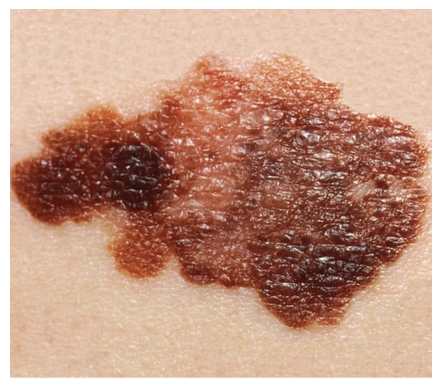

In [79]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#Melanoma
image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_10027419.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()

In [80]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.densenet import preprocess_input  # Ensure the correct preprocessing function is used

def preprocess_image(image_path, target_size=(224, 224)):
    
    image = load_img(image_path, target_size=target_size)
  
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    return image_array

def predict_skin_disease(model, image_path, class_labels):
    image_array = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

class_labels = ['Actinic Keratoses', 'Basal Cell Carcinoma', 
                'Benign Keratosis-Like Lesions', 'Dermatofibroma', 
                'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions']

image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_10027419.jpg'

model = load_model('Bonolo_Skin_Disease_CNNmodel.h5')

predicted_class_label = predict_skin_disease(model, image_path, class_labels)
print(f"Predicted Skin Disease Type: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Skin Disease Type: Melanoma


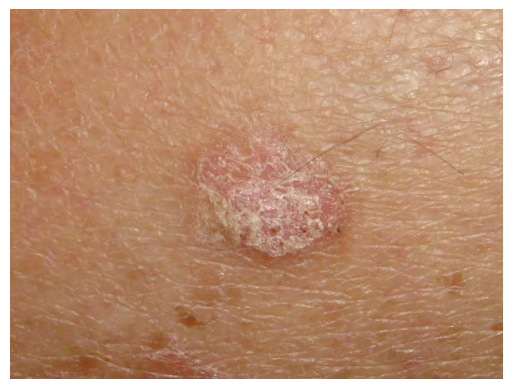

In [81]:
#Actinic Keratoses
image_path1 = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_20025030.jpg'
image1 = mpimg.imread(image_path1)

plt.imshow(image1)
plt.axis('off')
plt.show()

In [82]:
def preprocess_image(image_path1, target_size=(224, 224)):
    image1 = load_img(image_path1, target_size=target_size)
    image_array = img_to_array(image1)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    return image_array

def predict_skin_disease(model, image_path1, class_labels):
    image_array = preprocess_image(image_path1)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

class_labels = ['Actinic Keratoses', 'Basal Cell Carcinoma', 
                'Benign Keratosis-Like Lesions', 'Dermatofibroma', 
                'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions']

image_path1 = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_20025030.jpg'


model = load_model('Bonolo_Skin_Disease_CNNmodel.h5')

predicted_class_label = predict_skin_disease(model, image_path1, class_labels)
print(f"Predicted Skin Disease Type: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
Predicted Skin Disease Type: Melanocytic Nevi


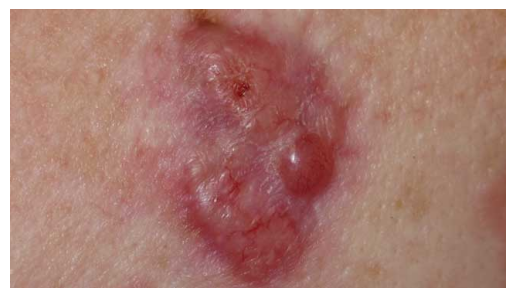

In [83]:
#Basal Cell Carcinoma
image_path3 = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_30026769.jpg'
image3 = mpimg.imread(image_path3)

plt.imshow(image3)
plt.axis('off')  
plt.show()

In [84]:
def preprocess_image(image_path3, target_size=(224, 224)):
    image3 = load_img(image_path3, target_size=target_size)
    image_array = img_to_array(image3)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    return image_array

def predict_skin_disease(model, image_path3, class_labels):
    image_array = preprocess_image(image_path3)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

class_labels = ['Actinic Keratoses', 'Basal Cell Carcinoma', 
                'Benign Keratosis-Like Lesions', 'Dermatofibroma', 
                'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions']

image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_30026769.jpg'

model = load_model('Bonolo_Skin_Disease_CNNmodel.h5')
predicted_class_label = predict_skin_disease(model, image_path3, class_labels)
print(f"Predicted Skin Disease Type: {predicted_class_label}")#Dermatofibroma

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
Predicted Skin Disease Type: Melanocytic Nevi


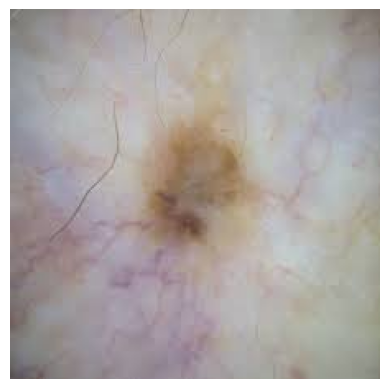

In [85]:
#Dermatofibroma
image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_40025661.jpeg'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()

In [86]:
def preprocess_image(image_path, target_size=(224, 224)):
    
    image = load_img(image_path, target_size=target_size)
  
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    return image_array

def predict_skin_disease(model, image_path, class_labels):
    image_array = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

class_labels = ['Actinic Keratoses', 'Basal Cell Carcinoma', 
                'Benign Keratosis-Like Lesions', 'Dermatofibroma', 
                'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions']

image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_40025661.jpeg'

model = load_model('Bonolo_Skin_Disease_CNNmodel.h5')

predicted_class_label = predict_skin_disease(model, image_path, class_labels)
print(f"Predicted Skin Disease Type: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
Predicted Skin Disease Type: Melanocytic Nevi


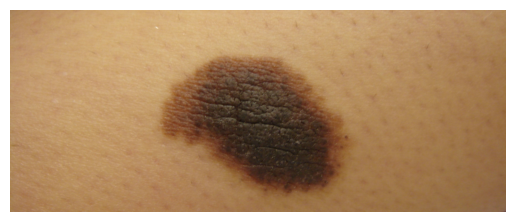

In [87]:
#Melanocytic Nevi
image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_50031633.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()

In [88]:
def preprocess_image(image_path, target_size=(224, 224)):
    
    image = load_img(image_path, target_size=target_size)
  
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    return image_array

def predict_skin_disease(model, image_path, class_labels):
    image_array = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

class_labels = ['Actinic Keratoses', 'Basal Cell Carcinoma', 
                'Benign Keratosis-Like Lesions', 'Dermatofibroma', 
                'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions']

image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_50031633.jpg'

model = load_model('Bonolo_Skin_Disease_CNNmodel.h5')

predicted_class_label = predict_skin_disease(model, image_path, class_labels)
print(f"Predicted Skin Disease Type: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
Predicted Skin Disease Type: Benign Keratosis-Like Lesions


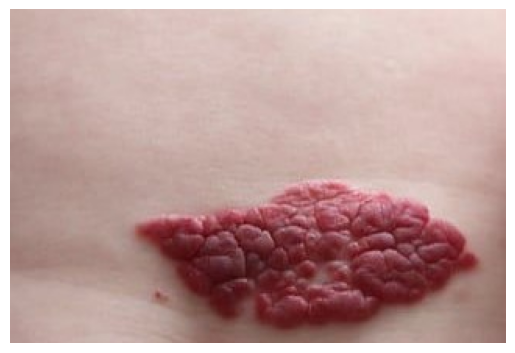

In [89]:
#Vascular Lesions
image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_60027850.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()

In [90]:
def preprocess_image(image_path, target_size=(224, 224)):
    
    image = load_img(image_path, target_size=target_size)
  
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    return image_array

def predict_skin_disease(model, image_path, class_labels):
    image_array = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

class_labels = ['Actinic Keratoses', 'Basal Cell Carcinoma', 
                'Benign Keratosis-Like Lesions', 'Dermatofibroma', 
                'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions']

image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_60027850.jpg'

model = load_model('Bonolo_Skin_Disease_CNNmodel.h5')

predicted_class_label = predict_skin_disease(model, image_path, class_labels)
print(f"Predicted Skin Disease Type: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step
Predicted Skin Disease Type: Melanoma


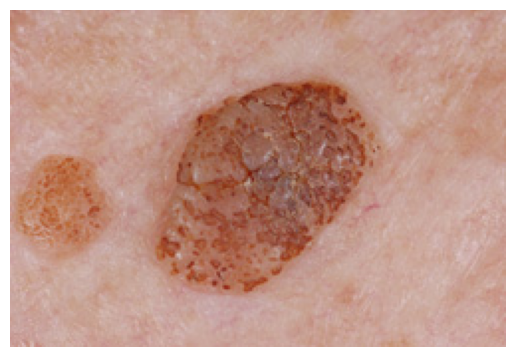

In [91]:
#Bkll
image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_70029176.jpg'
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()

In [92]:
def preprocess_image(image_path, target_size=(224, 224)):
    
    image = load_img(image_path, target_size=target_size)
  
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    return image_array

def predict_skin_disease(model, image_path, class_labels):
    image_array = preprocess_image(image_path)
    predictions = model.predict(image_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_label = class_labels[predicted_class_index]
    return predicted_class_label

class_labels = ['Actinic Keratoses', 'Basal Cell Carcinoma', 
                'Benign Keratosis-Like Lesions', 'Dermatofibroma', 
                'Melanocytic Nevi', 'Melanoma', 'Vascular Lesions']

image_path = '/kaggle/input/skin-disease-samples1/Samples/Sample Images/ISIC_70029176.jpg'

model = load_model('Bonolo_Skin_Disease_CNNmodel.h5')

predicted_class_label = predict_skin_disease(model, image_path, class_labels)
print(f"Predicted Skin Disease Type: {predicted_class_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Predicted Skin Disease Type: Melanoma


# Model Evaluation

In [93]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
from sklearn.metrics import confusion_matrix

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Get true labels and predictions
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
sensitivity = recall_score(y_true, y_pred_classes, average='weighted')
specificity = recall_score(y_true, y_pred_classes, pos_label=0, average='weighted')  # Specificity for class 0
f1_score_value = f1_score(y_true, y_pred_classes, average='weighted')
auc = roc_auc_score(y_true, y_pred, multi_class='ovr')
mse = mean_squared_error(y_true, y_pred_classes)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
variance = np.var(conf_matrix)
bias = np.mean(conf_matrix) - np.mean(y_true)

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1_score_value:.2f}")
print(f"AUC: {auc:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

  3/147 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9774 - loss: 0.5135

W0000 00:00:1728784591.072360     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - accuracy: 0.9384 - loss: 0.6071
  4/147 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step  

W0000 00:00:1728784602.096109     123 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step
Accuracy: 0.94
Sensitivity: 0.94
Specificity: 0.94
Precision: 0.95
F1-Score: 0.94
AUC: 1.00
Mean Squared Error: 0.32


147/147 ━━━━━━━━━━━━━━━━━━━━ 10s 66ms/step


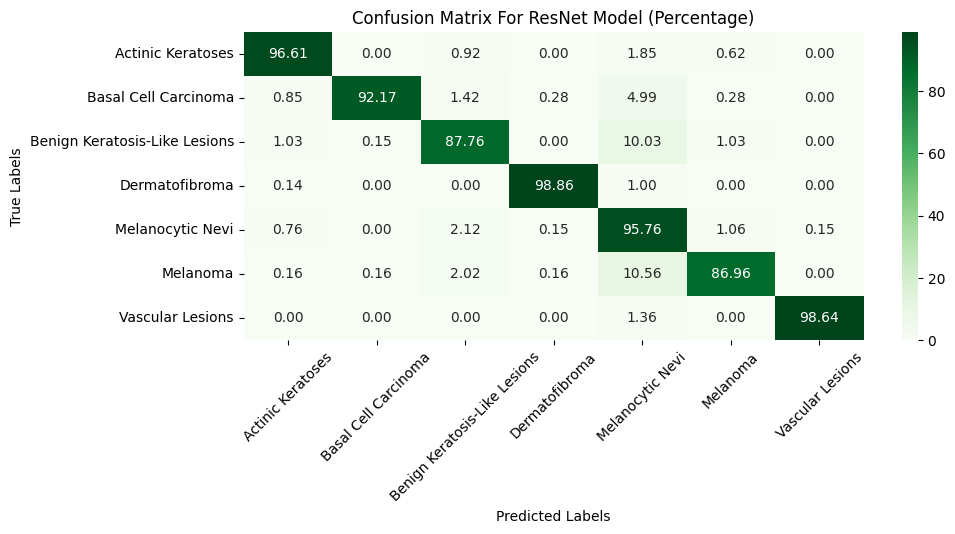

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have predictions and true_classes already
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Compute confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Normalize the confusion matrix to show percentages
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(10, 4))
sns.heatmap(conf_matrix_percentage, annot=True, cmap='Greens', fmt='.2f', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For ResNet Model (Percentage)')
plt.xticks(rotation=45)
plt.show()